Importes that you might need are given below

# import

8.530612244897958E-16  צעד הזמן שנבחר לחלק הזה


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_23928\1957008439.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim.log",sep='\s+')


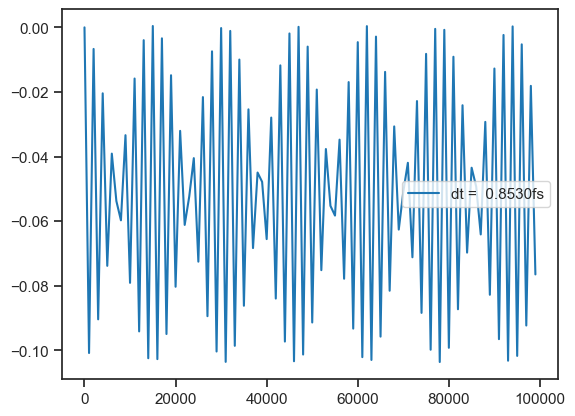

In [8]:

#for i in range (5): 
df = pd.read_csv("sim.log",sep='\s+')
x = df["step"].values
y = (df["E"].values - df["E"].values[0])/df["E"].values *100
plt.plot(x,y,label ='dt =  '+str(8.530612244897958E-16*1E15)[:6] + "fs" )
plt.legend()


In [ ]:
mass = 6.6E-26
omega = 7.56E13
(5/1E10*omega)**2*0.5*mass #חישבנו מראש את האנרגיה הכוללת, ויצא קרוב לתוצאות




4.715172e-17

# The Harmonic Oscillator

Start with one dimensional harmonic trap: $V=\frac{1}{2}m\omega^2 x^2$

**Simulation details:**

Number of particles: 1.

Initial position: x = 5 Angstrom.

Initial momenta: Zero.

Nsteps = 10000.

trap frequency, $\hbar\omega = 50 meV$

**Questions \& Figures**


1. Figure 1: Plot the change in the total energy with respect to t=0 (in precent) vs. time for different values of dt.
What is the largest dt you can use so that the energy is conserved better than 0.1% of its initial value?
1. Figure 2: Plot the position of the particle vs. time. Explain the observed dynamics.
1. Figure 3: Plot the potential and kinteic energies vs. time.
1. Figure 4: Plot the histogram of the position of the particle.
1. Figure 5: Plot the histogram of the momenta of the particle.
Explain the shape of the histograms in Figures 4-5. How do you excpect them to change in the canonical ensemble?


## figure 1

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_24456\406026247.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim"+str(i)+".log",sep='\s+')


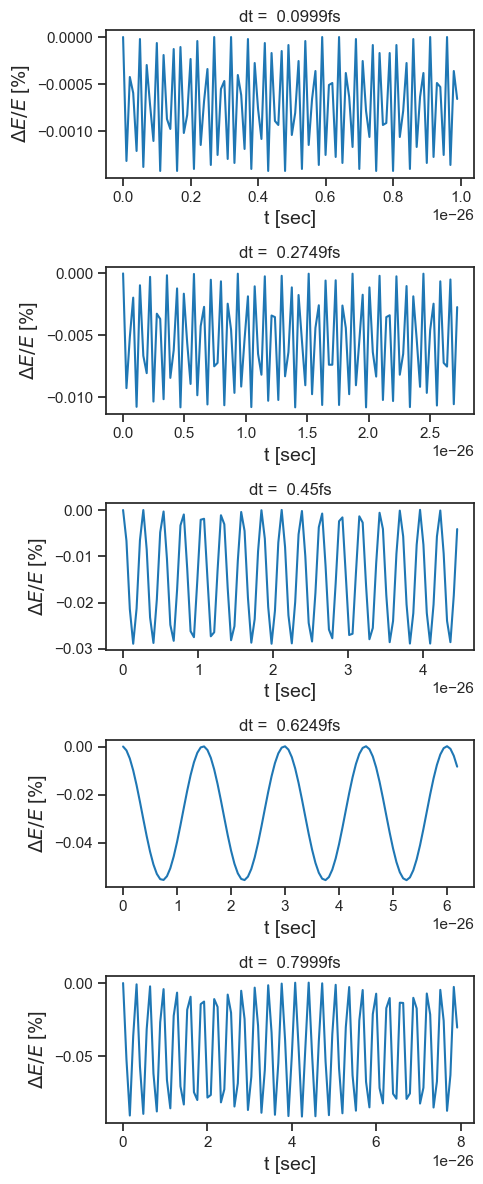

In [8]:
# just an example, you can do somthing else
fig, ax = plt.subplots(5,1,figsize=(5,12))
for i,dt in enumerate(np.linspace(0.1E-15, 0.8E-15, 5)):

    df = pd.read_csv("sim"+str(i)+".log",sep='\s+')
    x = df["step"].values*dt*1E-15
    y = (df["E"].values - df["E"].values[0])/df["E"].values[0] *100
    ax[i].plot(x ,y,label=str(i))
    # plt.legend()
    
    ax[i].set_title('dt =  '+str(dt*1E15)[:6] + "fs")
    ax[i].set_xlabel('t [sec]')
    ax[i].set_ylabel(r'$\Delta E/E$ [%]')
plt.tight_layout()


## figure 2


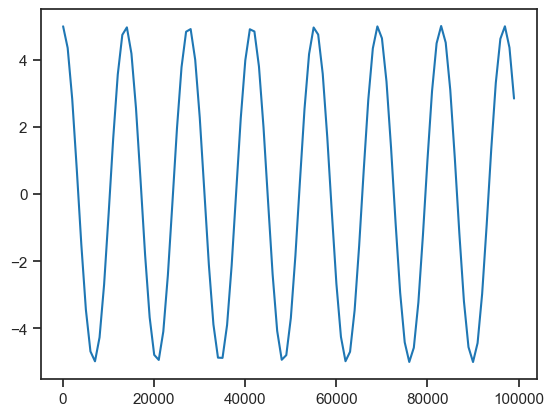

In [10]:
df = open("sim.xyz", 'r')

steps= []
pos= []

i = 0
for line in df:
    if (i%3 == 1):
        tmp = line.split()
        steps.append(float(tmp[-1]))
    elif(i%3 == 2):
        tmp = line.split()
        pos.append(float(tmp[1]))
    i+=1
plt.plot(steps,pos)

df.close()

## figure 3


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_2520\436794184.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim.log",sep='\s+')


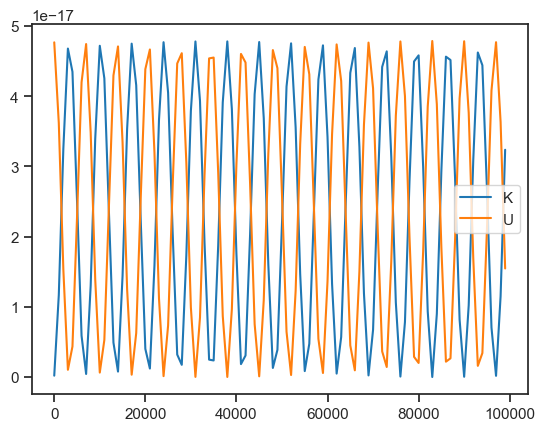

In [3]:
df = pd.read_csv("sim.log",sep='\s+')
x = df["step"].values
plt.plot(x,df["K"].values,label ="K")
plt.plot(x,df["U"].values,label ="U")
plt.legend()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_34576\4094794695.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim.log",sep='\s+')


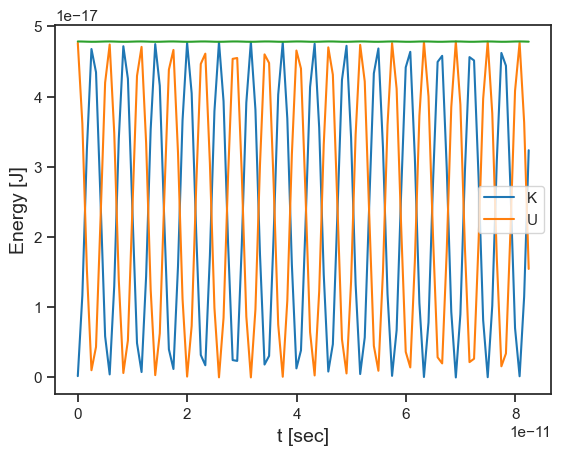

In [6]:
df = pd.read_csv("sim.log",sep='\s+')
x = df["step"].values*0.833E-15
plt.plot(x,df["K"].values,label ="K")
plt.plot(x,df["U"].values,label ="U")
plt.plot(x,(df["U"].values+ df["K"].values))
plt.ylabel("Energy [J]")
plt.xlabel("t [sec]")
plt.legend()

## figure 4



Text(0, 0.5, 'Density [1 / Angstrom]')

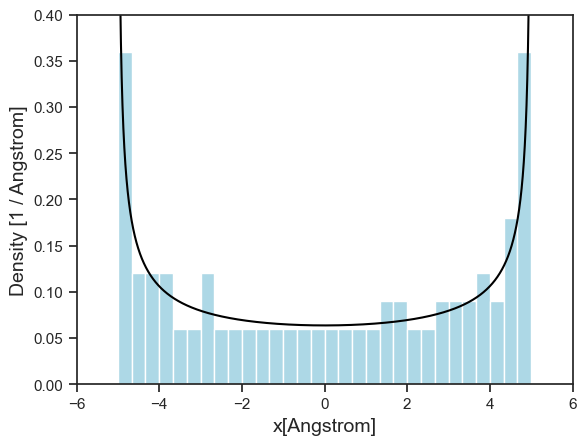

In [17]:
df = open("sim.xyz", 'r')
arr = 1/ (np.sqrt(25 - (x)**2))

steps= []
pos= []

i = 0
for line in df:
    if (i%3 == 1):
        tmp = line.split()
        steps.append(float(tmp[-1]))
    elif(i%3 == 2):
        tmp = line.split()
        pos.append(float(tmp[1]))
    i+=1

sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')
x = np.linspace(-4.99999, 4.99999 , num = 100000)
omega = 7.56E13

plt.xlim(-6,6)
plt.ylim(0,0.4)
plt.plot(x ,arr/np.trapz(arr,x) , color= "black")
plt.hist(pos, bins = 30, density=True, color="lightblue")
plt.xlabel("x[Angstrom]")
plt.ylabel("Density [1 / Angstrom]")


## figure 5

nan


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_28848\37620642.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("momenta.log",sep='\s+')
C:\Users\elira\AppData\Local\Temp\ipykernel_28848\37620642.py:7: RuntimeWarning: invalid value encountered in sqrt
  print(1 / (np.sqrt((5*mass*omega)**2 - (3e-11)**2)))


Text(0, 0.5, 'Density [1 / kg*m/sec]')

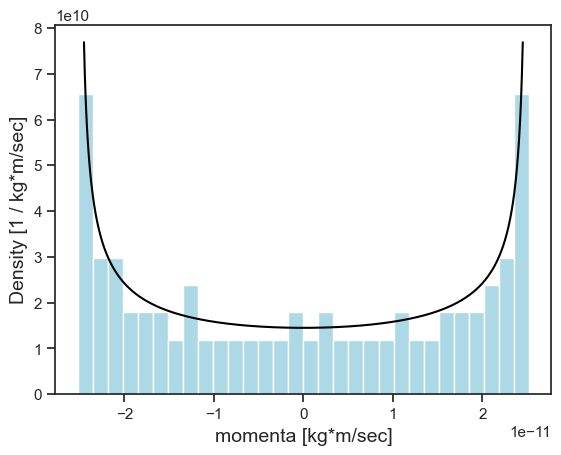

In [21]:
mass = 6.6E-26
omega = 7.56E13
df = pd.read_csv("momenta.log",sep='\s+')
tmp = df["MOMENTA_X"].values

x = np.linspace(-2.45e-11, 2.45e-11, num = 100000)
print(1 / (np.sqrt((5*mass*omega)**2 - (3e-11)**2)))
# plt.xlim(-6,6)
arr = 1 / (np.sqrt((5*mass*omega)**2 - (x)**2)) 


plt.plot(x ,arr/np.trapz(arr,x), color= "black")
plt.hist(tmp,bins = 30 , density=True , color = "lightblue")

plt.xlabel("momenta [kg*m/sec]")
plt.ylabel("Density [1 / kg*m/sec]")

## figure 6 - constant temp


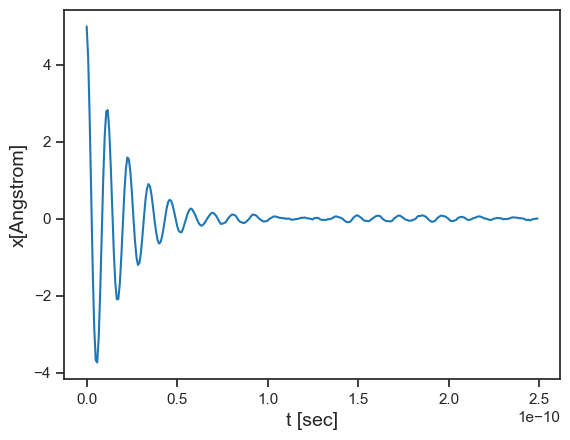

In [9]:
df = open("sim.xyz", 'r')

steps= []
pos= []

i = 0
for line in df:
    if (i%3 == 1):
        tmp = line.split()
        steps.append(float(tmp[-1])*0.833E-15)
    elif(i%3 == 2):
        tmp = line.split()
        pos.append(float(tmp[1]))
    i+=1
plt.plot(steps,pos)
plt.ylabel("x[Angstrom]")
plt.xlabel("t [sec]")

df.close()

## figure 7


446.69907941388885


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_34576\11975618.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim.log",sep='\s+')


Text(0, 0.5, 'temp [K]')

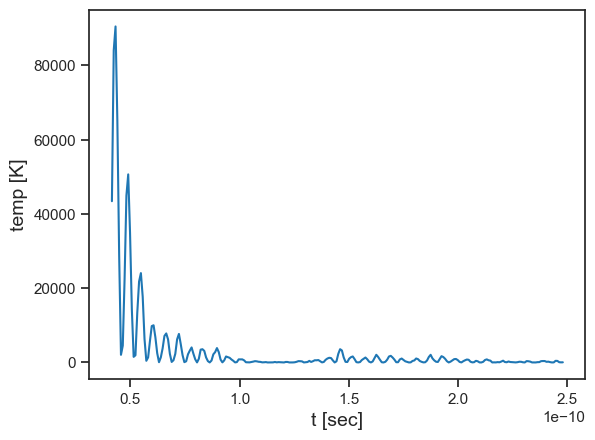

In [11]:
df = pd.read_csv("sim.log",sep='\s+')
x = df["step"].values*0.833E-15
plt.plot(x[50:],df["T"].values[50:])
print((df["T"].values[120:]).mean())


plt.xlabel("t [sec]")
plt.ylabel("temp [K]")
# plt.yscale('log')

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_34576\3253287777.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim.log",sep='\s+')


array([0.00000e+00, 8.33000e-13, 1.66600e-12, 2.49900e-12, 3.33200e-12,
       4.16500e-12, 4.99800e-12, 5.83100e-12, 6.66400e-12, 7.49700e-12,
       8.33000e-12, 9.16300e-12, 9.99600e-12, 1.08290e-11, 1.16620e-11,
       1.24950e-11, 1.33280e-11, 1.41610e-11, 1.49940e-11, 1.58270e-11,
       1.66600e-11, 1.74930e-11, 1.83260e-11, 1.91590e-11, 1.99920e-11,
       2.08250e-11, 2.16580e-11, 2.24910e-11, 2.33240e-11, 2.41570e-11,
       2.49900e-11, 2.58230e-11, 2.66560e-11, 2.74890e-11, 2.83220e-11,
       2.91550e-11, 2.99880e-11, 3.08210e-11, 3.16540e-11, 3.24870e-11,
       3.33200e-11, 3.41530e-11, 3.49860e-11, 3.58190e-11, 3.66520e-11,
       3.74850e-11, 3.83180e-11, 3.91510e-11, 3.99840e-11, 4.08170e-11,
       4.16500e-11, 4.24830e-11, 4.33160e-11, 4.41490e-11, 4.49820e-11,
       4.58150e-11, 4.66480e-11, 4.74810e-11, 4.83140e-11, 4.91470e-11,
       4.99800e-11, 5.08130e-11, 5.16460e-11, 5.24790e-11, 5.33120e-11,
       5.41450e-11, 5.49780e-11, 5.58110e-11, 5.66440e-11, 5.747

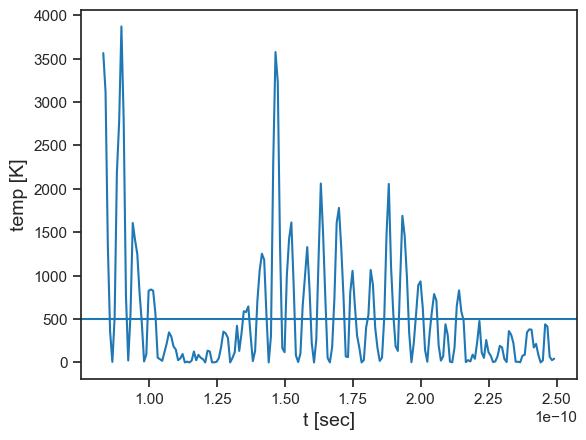

In [47]:
df = pd.read_csv("sim.log",sep='\s+')
x = df["step"].values*0.833E-15
plt.plot(x[100:],df["T"].values[100:])
plt.axhline((df["T"].values[150:]).mean())
#print((df["T"].values[150:]).mean())

plt.xlabel("t [sec]")
plt.ylabel("temp [K]")
# plt.yscale('log')
x

321.9248105946666


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_28848\100908872.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim.log",sep='\s+')


array([0.00000e+00, 8.33000e-13, 1.66600e-12, 2.49900e-12, 3.33200e-12,
       4.16500e-12, 4.99800e-12, 5.83100e-12, 6.66400e-12, 7.49700e-12,
       8.33000e-12, 9.16300e-12, 9.99600e-12, 1.08290e-11, 1.16620e-11,
       1.24950e-11, 1.33280e-11, 1.41610e-11, 1.49940e-11, 1.58270e-11,
       1.66600e-11, 1.74930e-11, 1.83260e-11, 1.91590e-11, 1.99920e-11,
       2.08250e-11, 2.16580e-11, 2.24910e-11, 2.33240e-11, 2.41570e-11,
       2.49900e-11, 2.58230e-11, 2.66560e-11, 2.74890e-11, 2.83220e-11,
       2.91550e-11, 2.99880e-11, 3.08210e-11, 3.16540e-11, 3.24870e-11,
       3.33200e-11, 3.41530e-11, 3.49860e-11, 3.58190e-11, 3.66520e-11,
       3.74850e-11, 3.83180e-11, 3.91510e-11, 3.99840e-11, 4.08170e-11,
       4.16500e-11, 4.24830e-11, 4.33160e-11, 4.41490e-11, 4.49820e-11,
       4.58150e-11, 4.66480e-11, 4.74810e-11, 4.83140e-11, 4.91470e-11,
       4.99800e-11, 5.08130e-11, 5.16460e-11, 5.24790e-11, 5.33120e-11,
       5.41450e-11, 5.49780e-11, 5.58110e-11, 5.66440e-11, 5.747

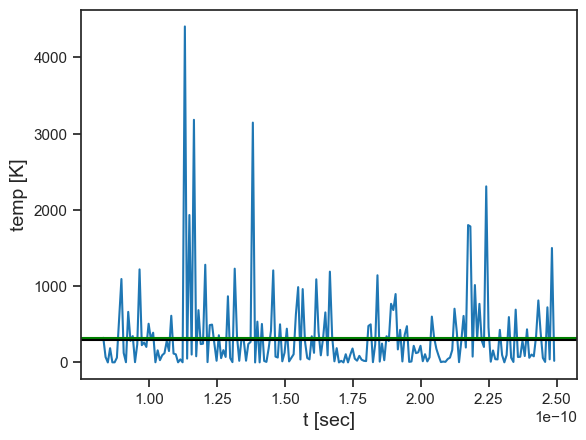

In [50]:
df = pd.read_csv("sim.log",sep='\s+')
x = df["step"].values*0.833E-15
plt.plot(x[100:],df["T"].values[100:] )
plt.axhline((df["T"].values[150:]).mean(), color = "green")
plt.axhline(298,color = "black")
print((df["T"].values[150:]).mean())

plt.xlabel("t [sec]")
plt.ylabel("temp [K]")
# plt.yscale('log')
x

## figure 8 - optimal gamma

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_34576\1158793512.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim"+str(i)+".log",sep='\s+')


Text(0, 0.5, 'avgtemp [K]')

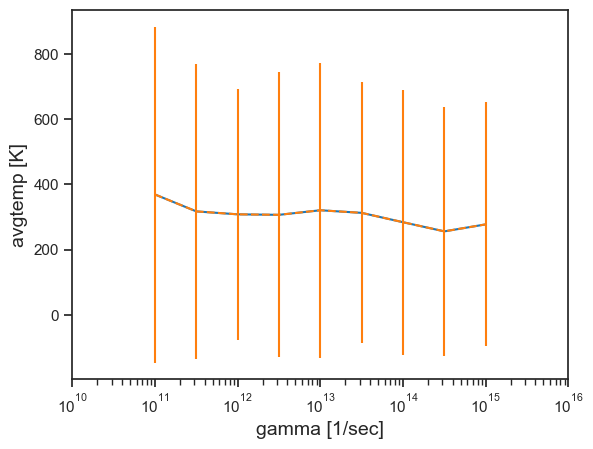

In [46]:
std = []
avgtemp =[]
x = []
for i in np.linspace(11, 15, 9):
    df = pd.read_csv("sim"+str(i)+".log",sep='\s+')
    avgtemp.append((df["T"].values[150:]).mean())
    std.append((df["T"].values[150:]).std())
    x.append(10**i)

plt.plot(x,avgtemp)
plt.xscale('log')
plt.xlim(1e10,1e16)
plt.errorbar(x,avgtemp,std,linestyle='--')

plt.xlabel("gamma [1/sec]")
plt.ylabel("avgtemp [K]")

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_23584\477767262.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim"+str(i)+".log",sep='\s+')
C:\Users\elira\AppData\Local\Temp\ipykernel_23584\477767262.py:9: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim15.0.log",sep='\s+')


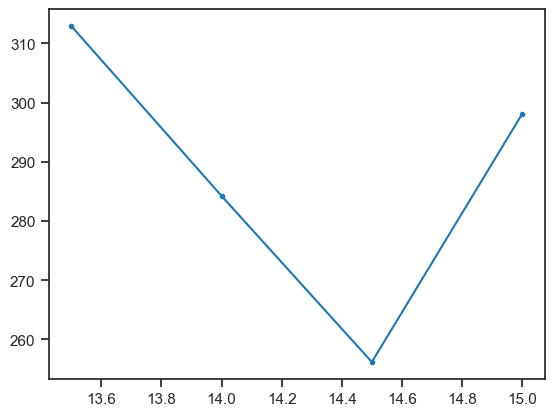

In [22]:
std = []
avgtemp =[]

for i in np.linspace(13.5, 14.5, 3):
    df = pd.read_csv("sim"+str(i)+".log",sep='\s+')
    avgtemp.append((df["T"].values[150:]).mean())
    std.append((df["T"].values[150:]).std())
x = np.linspace(13.5, 15, 4)
df = pd.read_csv("sim15.0.log",sep='\s+')
avgtemp.append( (df["T"].values[150:300]).mean())
plt.plot(x,avgtemp,'.-')

# print(avgtemp)
# std = []
# avgtemp =[]
# for i in np.linspace(13.5, 14.5, 3):
#     df = pd.read_csv("sim"+str(i)+".log",sep='\s+')
#     avgtemp.append((df["T"].values[150:300]).mean())
#     std.append((df["T"].values[150:300]).std())
# plt.plot(x,avgtemp,'.-')
# avgtemp


# df = pd.read_csv("sim15.0.log",sep='\s+')
# print( (df["T"].values[150:300]).mean())
# plt.errorbar(x,avgtemp,std,linestyle='--')

gamma = 1E13.8

## figure 9


1.7921082429111538e-13
1.6478654232673248e-13
[-8.54728465e-13 -8.19841589e-13 -7.84954712e-13 -7.50067836e-13
 -7.15180960e-13 -6.80294084e-13 -6.45407208e-13 -6.10520332e-13
 -5.75633456e-13 -5.40746580e-13 -5.05859704e-13 -4.70972827e-13
 -4.36085951e-13 -4.01199075e-13 -3.66312199e-13 -3.31425323e-13
 -2.96538447e-13 -2.61651571e-13 -2.26764695e-13 -1.91877819e-13
 -1.56990942e-13 -1.22104066e-13 -8.72171903e-14 -5.23303142e-14
 -1.74434381e-14  1.74434381e-14  5.23303142e-14  8.72171903e-14
  1.22104066e-13  1.56990942e-13  1.91877819e-13  2.26764695e-13
  2.61651571e-13  2.96538447e-13  3.31425323e-13  3.66312199e-13
  4.01199075e-13  4.36085951e-13  4.70972827e-13  5.05859704e-13
  5.40746580e-13  5.75633456e-13  6.10520332e-13  6.45407208e-13
  6.80294084e-13  7.15180960e-13  7.50067836e-13  7.84954712e-13
  8.19841589e-13  8.54728465e-13]
[8.33333333e+11 8.33333333e+11 8.33333333e+11 8.33333333e+11
 8.33333333e+11 8.33333333e+11 8.33333333e+11 8.33333333e+11
 8.33333333e+11 8.

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_28848\2099461894.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("momenta.log",sep='\s+')


Text(0, 0.5, 'Density')

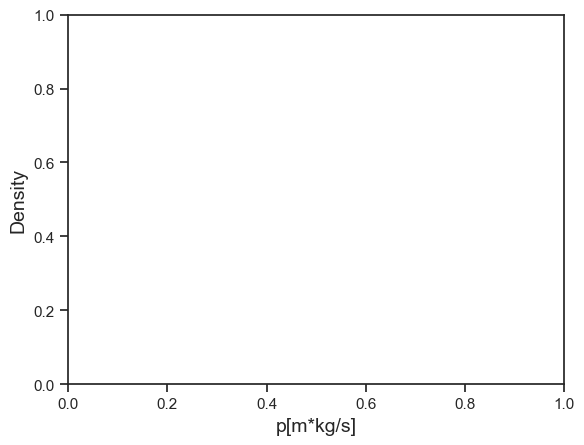

In [55]:
mass = 6.6E-26
omega = 7.56E13
df = pd.read_csv("momenta.log",sep='\s+')
from scipy.constants import Boltzmann as BOLTZMANN
from scipy.stats import norm
#print(BOLTZMANN)
xaxis = np.linspace(-6, 6)*1E-13
sigma = 1 / np.sqrt((1/(BOLTZMANN * 298* 1E20 *mass)))
print(np.std(df["MOMENTA_X"].values[100:]))
print(sigma)

#plt.plot(xaxis, norm.pdf(xaxis, 0, sigma), color='black')

#plt.hist(df["MOMENTA_X"].values[100:],density=True,  bins=30, color = "lightblue")
print((xaxis*mass *( 1/BOLTZMANN * 298) ))
print(np.exp(xaxis*mass *( 1/BOLTZMANN * 298))/ np.trapz(np.exp(xaxis*mass *( 1/BOLTZMANN * 298)), xaxis))

plt.xlabel("p[m*kg/s]")
plt.ylabel("Density")

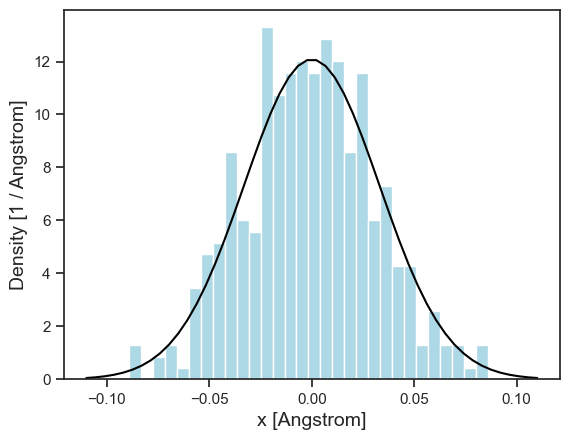

In [ ]:
mass = 6.6E-26
omega = 7.56E13
from scipy.constants import Boltzmann as BOLTZMANN
from scipy.stats import norm

xaxis = np.linspace(-0.11, 0.11)
sigma = 1 / np.sqrt((1/(BOLTZMANN * 298 * 1E20)) * mass * omega ** 2)


plt.plot(xaxis, norm.pdf(xaxis, 0, sigma), color='black')
df = open("sim.xyz", 'r')

steps= []
pos= []

i = 0
for line in df:
    if (i%3 == 1):
        tmp = line.split()
        steps.append(float(tmp[-1]))
    elif(i%3 == 2):
        tmp = line.split()
        pos.append(float(tmp[1]))
    i+=1
plt.hist(pos[100:], bins=30,density=True ,color = "lightblue")
plt.xlabel("x [Angstrom]")
plt.ylabel("Density [1 / Angstrom]")
df.close()

